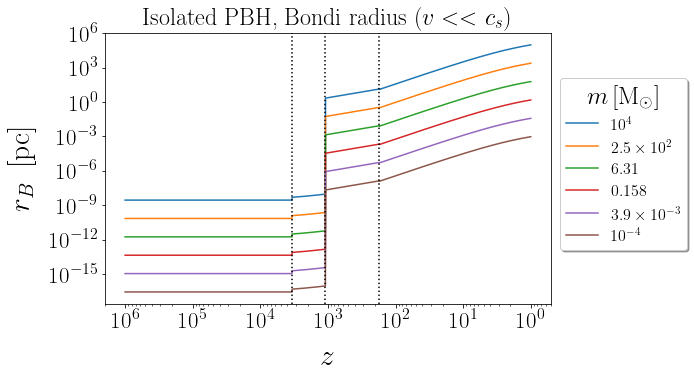

In [1]:
# Bondi radius due to baryon accretion

%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatterExponent
from matplotlib.colors import LogNorm
from matplotlib import ticker, cm
from accretion import *
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
 

# Bondi radius of isolated PBH of mass m with v << c_s(z)
# c_s(z) is given by Jared R. Rice, Bing Zhang (https://arxiv.org/abs/1702.08069v2)


N = 6
m_arr = np.geomspace(1e4, 1e-4, N)
m_list = m_arr.tolist()


z = np.geomspace(1e6, 1, 100000)
z_list = z.tolist()
r_B_list = np.zeros(len(z_list))
fig, ax = plt.subplots(1, figsize=(8, 5))
for j, m in enumerate(m_list):
    m*= M_solar
    for i, z in enumerate(z_list):
        r_B_list[i] = r_B(m, z)
    ax.loglog(z_list, r_B_list/pc)

    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.axvline(x = z_rec, color = 'k',  linestyle = ':')
plt.axvline(x = z_th, color = 'k',  linestyle = ':')
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.title('Isolated PBH, Bondi radius ($v<< c_{s}$)', fontsize = 24, pad = 8)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$r_{B} \, $ [pc]',fontsize = 29.5, labelpad = 12)
plt.xlim(2e6, 0.5)
plt.show()


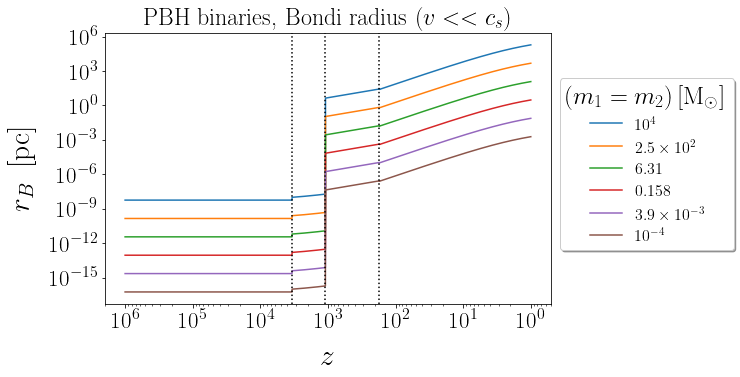

In [2]:
# Bondi radius of PBH in the binary with masses m_1 and m_2
# c_s(z) is given by Jared R. Rice, Bing Zhang (https://arxiv.org/abs/1702.08069v2)


m1_arr = np.geomspace(1e4, 1e-4, N)
m2_arr = np.geomspace(1e4, 1e-4, N)
m1_list = m1_arr.tolist()
m2_list = m2_arr.tolist() 
z = np.geomspace(1e6, 1, 100000)
z_list = z.tolist()
r_B_list = np.zeros(len(z_list))

fig, ax = plt.subplots(1, figsize=(8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']
for j, (m1, m2) in enumerate(zip(m1_list, m2_list)):
    m1*= M_solar
    m2*= M_solar
    for i, z in enumerate(z_list):
        m = (m1 + m2)
        r_B_list[i] = r_B(m, z)
    ax.loglog(z_list, r_B_list/pc)


    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.axvline(x = z_rec, color = 'k',  linestyle = ':')
plt.axvline(x = z_th, color = 'k',  linestyle = ':')
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$(m_{1} = m_{2})\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.title('PBH binaries, Bondi radius ($v<< c_{s}$)', fontsize = 24, pad = 8)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$r_{B} \, $ [pc]',fontsize = 29.5, labelpad = 12)
plt.xlim(2e6, 0.5)
plt.savefig('r_B_binary.pdf', bbox_inches = 'tight')
plt.show()

In [2]:
# most probable (denoted by 'mp') value of semi-major axis, a 
# of isolated PBH binaries (with no DM halos) merging today
# Here, x = x_bar 


def semi_mp(m_1, m_2, Δ_1, Δ_2): # For λ <<1 or up to the first order in λ.
    
    def f_(m):
        return f * P(m)
    
    def f_b(m_1, m_2):
        return  f_(m_1) + f_(m_2)
    
    m_b = m_1 + m_2
    
    def x̄(m_1, m_2, Δ_1, Δ_2):
        return (((3 * (m_1 + m_2))/(4 * π * ρ_eq * f_b(m_1, m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
    def X_mp(m_1, m_2, Δ_1, Δ_2):
        k = 22.3821
        A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)
        def B(m_1,m_2,Δ_1,Δ_2):
            return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))
        return (2**(-21/74)) * ((B(m_1, m_2, Δ_1, Δ_2))**(21/37))
    
    def λ_mp(m_1, m_2, Δ_1, Δ_2):   #λ_0
            return  X_mp(m_1, m_2, Δ_1, Δ_2)/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    return  (0.0977* λ_mp(m_1, m_2, Δ_1, Δ_2) + 0.0068 * (λ_mp(m_1, m_2, Δ_1, Δ_2)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X_mp(m_1, m_2, Δ_1, Δ_2)**(1/3))



N = 6
bin_centres = np.geomspace(1e4, 1e-4, N)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ1_list = deltas.tolist()
Δ2_list = deltas.tolist()
m1_arr = np.geomspace(1e4, 1e-4, N)
m2_arr = np.geomspace(1e4, 1e-4, N)
m1_list = m1_arr.tolist()
m2_list = m2_arr.tolist() 

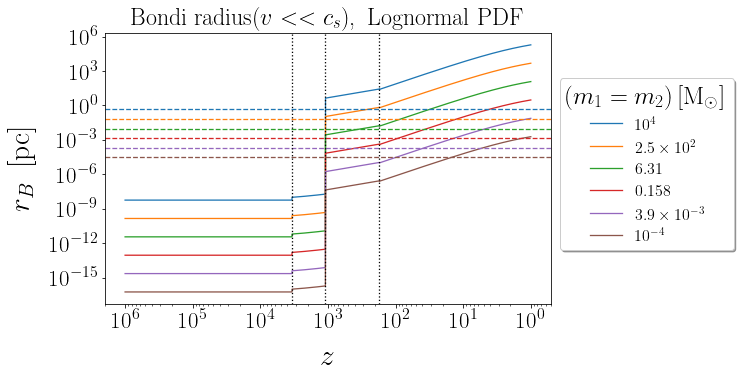

In [10]:
# Comparison of most probable (denoted by 'mp') value of semi-major axis, a 
# of isolated binaries merging today with the combined Bondi Radius of 
# PBHs in it. 
# Here, PBH mass Distribution is Log-Normal PDF. 


f_pbh = 1.61e-3
f = 0.85 * f_pbh
def P(m):                  #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15  * M_solar              #in units of M☉,
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))


fig, ax = plt.subplots(1, figsize=(8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']
for j, (m_1, m_2, Δ_1, Δ_2, clr) in enumerate(zip(m1_list, m2_list, Δ1_list, Δ2_list, colors)):
    m_1*= M_solar
    m_2*= M_solar
    Δ_1*= M_solar
    Δ_2*= M_solar
    for i, z in enumerate(z_list):
        m = (m_1 + m_2)
        r_B_list[i] = r_B(m, z)
    ax.loglog(z_list, r_B_list/pc, color = clr)
for k, (m_1, m_2, Δ_1, Δ_2, clr) in enumerate(zip(m1_list, m2_list, Δ1_list, Δ2_list, colors)):
    m_1*= M_solar
    m_2*= M_solar
    Δ_1*= M_solar
    Δ_2*= M_solar
    ax.axhline(y = semi_mp(m_1, m_2, Δ_1, Δ_2)/pc,linestyle = '--', color = clr)


plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.axvline(x = z_rec, color = 'k',  linestyle = ':')
plt.axvline(x = z_th, color = 'k',  linestyle = ':')
plt.xlim(2e6, 0.5)
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$r_{B} \, $ [pc]',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$(m_{1} = m_{2})\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.title('Bondi radius($v<< c_{s}$),\, Lognormal PDF', fontsize = 24, pad = 8)
plt.savefig('r_B_lgnml.pdf', bbox_inches = 'tight')
plt.show()

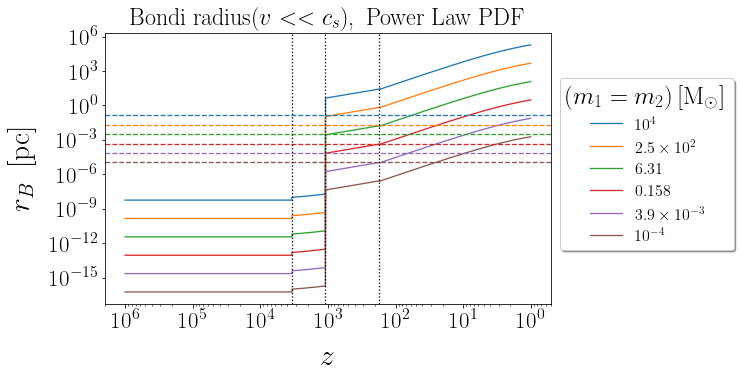

In [11]:
# Comparison of most probable (denoted by 'mp') value of semi-major axis, a 
# of isolated binaries merging today with the combined Bondi Radius of 
# PBHs in it. 
# Here, PBH mass Distribution is Powerlaw PDF. 



f_pbh = 2.53e-2     #choosen as per microlensing constraints
f = 0.85*f_pbh
def P(m):     #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-4      #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))


fig, ax = plt.subplots(1, figsize=(8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']
for j, (m_1, m_2, Δ_1, Δ_2, clr) in enumerate(zip(m1_list, m2_list, Δ1_list, Δ2_list, colors)):
    m_1*= M_solar
    m_2*= M_solar
    Δ_1*= M_solar
    Δ_2*= M_solar
    for i, z in enumerate(z_list):
        m = (m_1 + m_2)        # We take Bondi radius for PBH of point mass (m_1 + m_2)
        r_B_list[i] = r_B(m, z)
    ax.loglog(z_list, r_B_list/pc, color = clr)
for k, (m_1, m_2, Δ_1, Δ_2, clr) in enumerate(zip(m1_list, m2_list, Δ1_list, Δ2_list, colors)):
    m_1*= M_solar
    m_2*= M_solar
    Δ_1*= M_solar
    Δ_2*= M_solar
    ax.axhline(y = semi_mp(m_1, m_2, Δ_1, Δ_2)/pc, linestyle = '--', color = clr)


plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.axvline(x = z_rec, color = 'k',  linestyle = ':')
plt.axvline(x = z_th, color = 'k',  linestyle = ':')
plt.xlim(2e6, 0.5)
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$r_{B} \, $ [pc]',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$(m_{1} = m_{2})\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.title('Bondi radius($v<< c_{s}$),\, Power Law PDF', fontsize = 24, pad = 8)
plt.savefig('r_B_PWR.pdf', bbox_inches = 'tight')
plt.show()

In [12]:
# 1.) Bondi radius r_B increases with increase in m_pbh.


# 2.) We see in the above plots that r_B << a_mp for PBH binaries of equal masses 
#     up to z_rec and then since the speed of sound c_s suddenly decreases at 
#     z_rec because matter and the radiation decouples due to which 
#     the pressure decreases. This leads to increase r_B after z_rec. 
#     After that depending on the masses of the PBHs in the binary, r_B eventually 
#     becomes larger than a_mp which is a favourable condition of the formation of 
#     the circumbinary disk around the PBH binaries.

In [13]:
# Let us define the redshift z_circumbinary at which the Bondi radius becomes
# larger than the most probable value of the semi-major axis of the binary.

# Now, we want to see how the typical value of z_circumbinary varies for
# PBH binaries of different masses.

In [3]:
# Redshift z_circumbinary at which the Bondi radius becomes larger
# than the most probable value of the semi-major axis of the binary.

def z_circumbinary(m_1, m_2, Δ_1, Δ_2):
    z = np.geomspace(1e6, 1, 1000000)
    z_list = z.tolist()
    r_B_list = np.zeros(len(z_list))
    semi =  semi_mp(m_1, m_2, Δ_1, Δ_2)
    for i, z in enumerate(z_list):
        m = (m_1 + m_2)
        r_B_list[i] = r_B(m, z)
    for k in  range(1,len(r_B_list)):
        z_c = z_list[k]
        if r_B_list[k] > semi:
            #print("z_c =", z_c)
            break
        
    z_cr = z_c
    #print("z_cr =", z_cr)
    
    return z_cr



def tick(x):
    n = np.floor(np.log10(x))
    str1 = ""
    m = x*(10.0**(-n))
    if (n > 1 and m!= 1): 
        str_1 = r'$%d \times ' % (m,)
        str_2 =  r'10^{%d}$' % n
        str_f = str_1 + str_2
        return  str_f
    elif (n > 1 and m== 1):
        str_f =  r'$10^{%d}$' % n
        return  str_f
    else:
        str_f = x
    return str_f



N = 100
bin_centres = np.geomspace(1e4, 1e-4, N)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ1_list = deltas.tolist()
Δ2_list = deltas.tolist()
m1_arr = np.geomspace(1e4, 1e-4, N)
m2_arr = np.geomspace(1e4, 1e-4, N)
m1_list = m1_arr.tolist()
m2_list = m2_arr.tolist() 

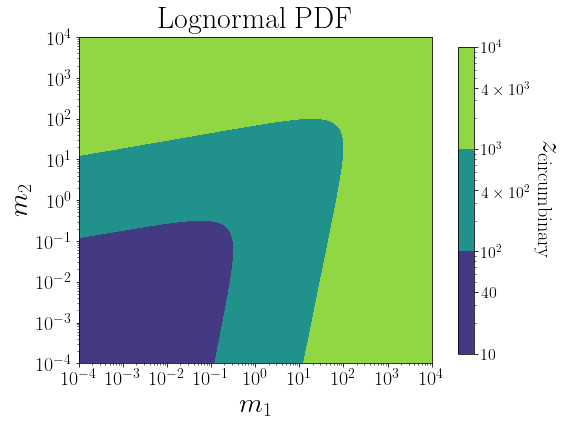

In [4]:
# Contour Plot of z_circumbinary for Lornormal PDF.

f_pbh = 1.61e-3
f = 0.85 * f_pbh
def P(m):                  #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15  * M_solar              #in units of M☉,
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))



z_countourf = np.zeros((N, N))
for k, (m_1, Δ_1)  in enumerate(zip(m1_list, Δ1_list)):
    m_1*= M_solar
    Δ_1*= M_solar
    for l, (m_2, Δ_2) in enumerate(zip(m2_list, Δ2_list)):
        m_2*= M_solar
        Δ_2*= M_solar
        z_countourf[k,l] = z_circumbinary(m_1, m_2, Δ_1, Δ_2)
        

        
fig, ax = plt.subplots(1, figsize=(8, 6))
PLOT = ax.contourf(m1_list, m2_list, z_countourf, locator=ticker.LogLocator())
cbar = plt.colorbar(PLOT, shrink = 0.94, pad = 0.06, orientation = "vertical")
cbar.ax.set_yscale('log')
ticks = [10,  40, 100, 4e2, 1000, 4e3, 1e4]
tick_list = np.zeros(len(ticks), dtype ='U100')
for i, x in enumerate(ticks):
    tick_list[i] = tick(x)
cbar.set_ticks(ticks)
cbar.set_ticklabels([ticks for ticks in tick_list])



cbar.set_label('$z_\mathrm{circumbinary}$', rotation = 270, fontsize = 29, labelpad = 30)
cbar.ax.tick_params(labelsize = 16)


plt.xlabel('$m_{1}$', fontsize = 28)
plt.ylabel('$m_{2} $', fontsize = 28)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.title('Lognormal PDF', fontsize = 30, pad = 10)
plt.savefig('contrlgml.pdf', bbox_inches = 'tight')
plt.show()

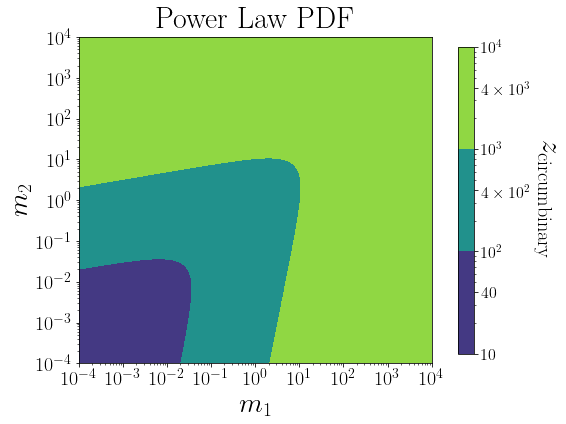

In [5]:
# Contour Plot of z_circumbinary for Power Law PDF.

f_pbh = 2.53e-2     #choosen as per microlensing constraints
f = 0.85*f_pbh
def P(m):     #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-4      #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))



N = 100
z_countourf = np.zeros((N, N))
for k, (m_1, Δ_1)  in enumerate(zip(m1_list, Δ1_list)):
    m_1*= M_solar
    Δ_1*= M_solar
    for l, (m_2, Δ_2) in enumerate(zip(m2_list, Δ2_list)):
        m_2*= M_solar
        Δ_2*= M_solar
        z_countourf[k,l] = z_circumbinary(m_1, m_2, Δ_1, Δ_2)
        

fig, ax = plt.subplots(1, figsize=(8, 6))
PLOT = ax.contourf(m1_list, m2_list, z_countourf, locator = ticker.LogLocator())
cbar = plt.colorbar(PLOT, shrink = 0.94, pad = 0.06, orientation = "vertical")
cbar.ax.set_yscale('log')
ticks = [10,  40, 100, 4e2, 1000, 4e3, 1e4]
tick_list = np.zeros(len(ticks), dtype = 'U100')
for i, x in enumerate(ticks):
    tick_list[i] = tick(x)
cbar.set_ticks(ticks)
cbar.set_ticklabels([ticks for ticks in tick_list])

cbar.set_label('$z_\mathrm{circumbinary}$', rotation = 270, fontsize = 29, labelpad = 30)
cbar.ax.tick_params(labelsize = 16)

plt.xlabel('$m_{1}$', fontsize = 28)
plt.ylabel('$m_{2} $', fontsize = 28)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.title('Power Law PDF',  fontsize = 30, pad = 10)
plt.savefig('contrPWR.pdf', bbox_inches = 'tight')
plt.show()